# DIABETES PREDICTION

**This script preprocessing includes how to check for missing values,as well as replace missing values, categorize, and process non-numeric values (OUTCOME (object))and duplicate values, and outliers and replace unreasonable values (0).**   

**The training data were compared with and without scaling.**  

**The model uses logistic regression, k-NN, random forest and MLP. PCA and the model were compared with and without scaling, and the confusion matrix was evaluated in each link.**  

**The hyperparametric tuning is optimized by grid search and random search, and the optimal model is selected by cross-validation**

## Importing Modules

In [68]:
#import  Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,roc_auc_score, precision_score,f1_score,plot_roc_curve,plot_roc_curve, plot_confusion_matrix,classification_report
from HF_Functions import correlated_map,label_encoder,grab_col_names,cat_summary,detect_outliers
import warnings 
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

## Data Analyse and preprocessing 

In [69]:
# Load Dataset Showing the dataset information
df = pd.read_csv("datasets/diabetes-dataset.csv")
df.head()# check first 5 rows of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,YES
1,0,84,82,31,125,38.2,0.233,23,NO
2,0,145,0,0,0,44.2,0.630,31,YES
3,0,135,68,42,250,42.3,0.365,24,YES
4,1,139,62,41,480,40.7,0.536,21,NO


In [70]:
df.shape# check No. of columns and rows

(2000, 9)

In [71]:
df.info()#Check feature information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   object 
dtypes: float64(2), int64(6), object(1)
memory usage: 140.8+ KB


In [72]:
# Descriptive statistics of the data set accessed.
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,0.000,1.000,3.000,6.000,9.0000,10.000,13.00000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,85.000,99.000,117.000,141.000,168.0000,181.000,195.00000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,54.000,63.500,72.000,80.000,88.0000,90.000,106.00000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,0.000,23.000,32.000,40.0000,44.050,52.00000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,0.000,40.000,130.000,210.0000,293.000,495.00000,744.00
BMI,2000.0,32.19300,8.149901,0.000,23.700,27.375,32.300,36.800,42.1000,45.010,52.90000,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.164,0.244,0.376,0.624,0.8782,1.136,1.60098,2.42
Age,2000.0,33.09050,11.786423,21.000,22.000,24.000,29.000,40.000,50.0000,58.000,67.00000,81.00


###  Checking Missing values and Handling Missing values

In [73]:
### Check Missing values

# Does data has some missing values?
dataset = df.isnull().sum().sum()
if dataset == 0:
    print('Data has no missing values')
else:
    print('Data has missing values')#checks variables have any Nan values

Data has no missing values


In [74]:
df.info()# recheck 
'''When we examine NaN values with isnull() in the data set,
 no records are found; however, too many 0's stand out in the columns such as blood pressure, BMI, skin thickness.
  This is illogical, so these values should be treated as missing values.
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   object 
dtypes: float64(2), int64(6), object(1)
memory usage: 140.8+ KB


"When we examine NaN values with isnull() in the data set,\n no records are found; however, too many 0's stand out in the columns such as blood pressure, BMI, skin thickness.\n  This is illogical, so these values should be treated as missing values.\n"

In [75]:
#Replace the value of 0 with NAN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [76]:
# Now, we can  check where are missing and (0)NAN values   
df.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [77]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,YES
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,NO
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,YES
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,YES
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,NO


In [78]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)#

In [79]:
# Change to upper case for ease of input
df.columns = [col.upper() for col in df.columns]
cat_cols = [x.upper() for x in cat_cols]
num_cols = [x.upper() for x in num_cols]
cat_but_car = [x.upper() for x in cat_but_car]

In [80]:
columns = df.columns
columns = columns.drop("OUTCOME")

In [81]:

"""1 .Violent method: we can delete rows with missing values: missing values can be dealt with by deleting rows or columns with null values. 
The disadvantage is that a large amount of information is lost and the percentage of missing values is too large to be effective.""" 
"""2. We estimated the missing values using the mean/median.
Prevents data loss leading to deleted rows or columns and works well on a small data set and is easy to implement. """
'''To fill in the missing values, 
we will group the columns with empty values according to OUTCOME 
and add the median value of the target variable corresponding to the relevant blank value.'''
for i in columns:   
    #The action of taking the median value for values with a partial characteristic of 0.
  df[i] = df[i].fillna(df.groupby("OUTCOME")[i].transform("median"))

In [82]:
df.head()# some  0 values  has replace to median values

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,2,138.0,62.0,35.0,167.0,33.6,0.127,47,YES
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,NO
2,0,145.0,75.0,32.0,167.0,44.2,0.630,31,YES
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,YES
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,NO


In [83]:
df.nunique()# Checking unique values

PREGNANCIES                  17
GLUCOSE                     135
BLOODPRESSURE                46
SKINTHICKNESS                52
INSULIN                     181
BMI                         246
DIABETESPEDIGREEFUNCTION    505
AGE                          52
OUTCOME                       2
dtype: int64

###   Check duplicated values and Handling duplicate values

In [84]:
Dplicated=df.duplicated().sum()   # check  dups value in file
Dplicated

1256

In [85]:
'''    !!! IMPORTANT!!!
 Because the sample is less than 1000 after removing the duplicates values and to get a better model,
 only the code is shown here without removing the duplicate values'''
#df.drop_duplicates()  

'    !!! IMPORTANT!!!\n Because the sample is less than 1000 after removing the duplicates values and to get a better model,\n only the code is shown here without removing the duplicate values'

### Outlier Detection and Handling outliers

In [86]:
outliers_to_drop = detect_outliers(df, 2 ,["PREGNANCIES", 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE'])

In [87]:
df.loc[outliers_to_drop] # Show the outliers rows

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,YES
1335,0,129.0,110.0,46.0,130.0,67.1,0.319,26,YES
1998,0,129.0,110.0,46.0,130.0,67.1,0.319,26,YES
370,3,173.0,82.0,48.0,465.0,38.4,2.137,25,YES
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,YES
840,3,173.0,82.0,48.0,465.0,38.4,2.137,25,YES
915,0,180.0,78.0,63.0,14.0,59.4,2.420,25,YES
1504,0,180.0,78.0,63.0,14.0,59.4,2.420,25,YES
1623,3,173.0,82.0,48.0,465.0,38.4,2.137,25,YES


In [88]:
df.drop(df.loc[outliers_to_drop].index, inplace=True)# drop  outlier values 

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PREGNANCIES,1991.0,3.715721,3.307149,0.000,1.000,3.000,6.0000,17.000
GLUCOSE,1991.0,121.805123,30.483824,44.000,99.000,117.000,141.0000,199.000
BLOODPRESSURE,1991.0,72.313410,11.890844,24.000,64.000,72.000,80.0000,122.000
SKINTHICKNESS,1991.0,29.108488,9.091953,7.000,25.000,28.000,32.0000,110.000
INSULIN,1991.0,140.921647,83.105321,15.000,105.000,105.000,167.0000,744.000
BMI,1991.0,32.523456,7.004700,18.200,27.500,32.300,36.6000,80.600
DIABETESPEDIGREEFUNCTION,1991.0,0.465712,0.308522,0.078,0.244,0.375,0.6195,2.329
AGE,1991.0,33.125565,11.801427,21.000,24.000,29.000,40.0000,81.000


<AxesSubplot:>

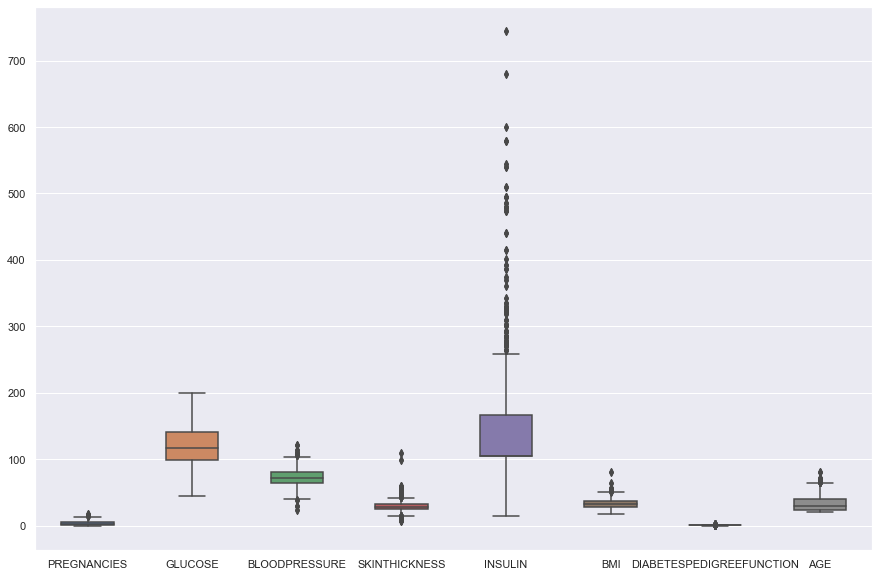

In [90]:
# check the outliers
fig,axes=plt.subplots(figsize = (15,10))
sns.boxplot(data=df, ax=axes,width=0.5) #draw the grapg of box plot

### LabelEncoder 

In [91]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]
len(binary_cols)#Using LabelEncoder, change the binary nominal feature to a binary integer 0 or 1 

1

In [92]:
for col in binary_cols:
    label_encoder(df, col)

df.head()
#replace OUTCOME values to binary

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,2,138.0,62.0,35.0,167.0,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,75.0,32.0,167.0,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


## Data Visualizations 

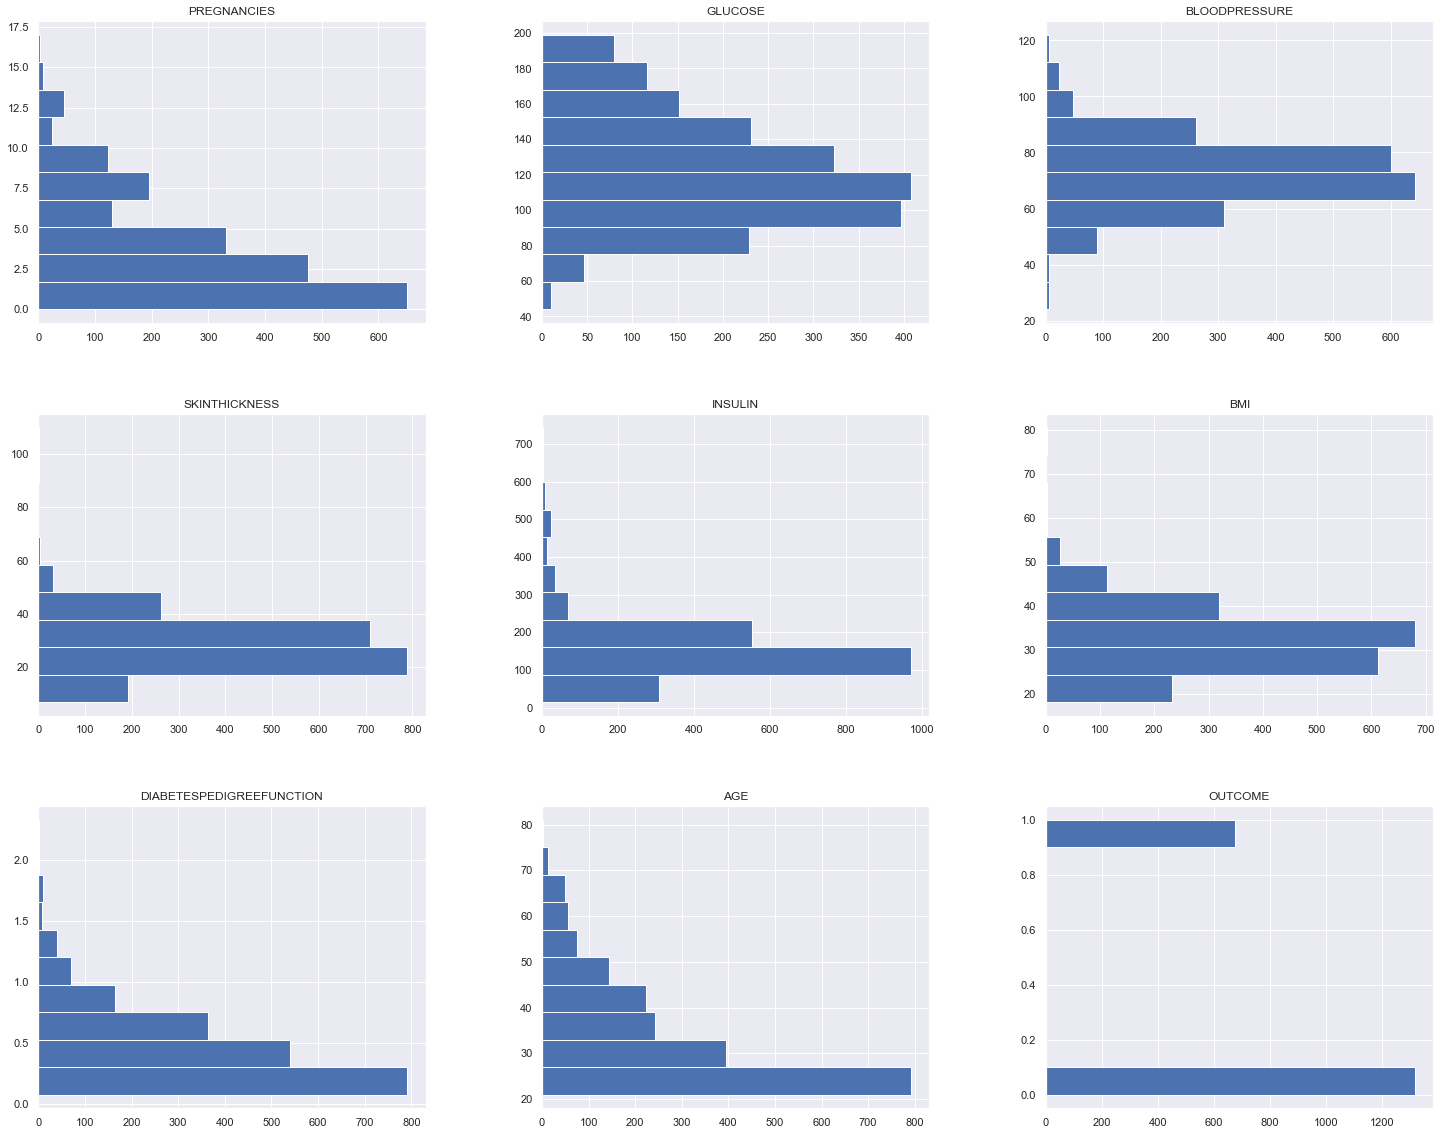

In [93]:
features = df.hist(orientation='horizontal', figsize=(25,20)) #Plotting horizontal features

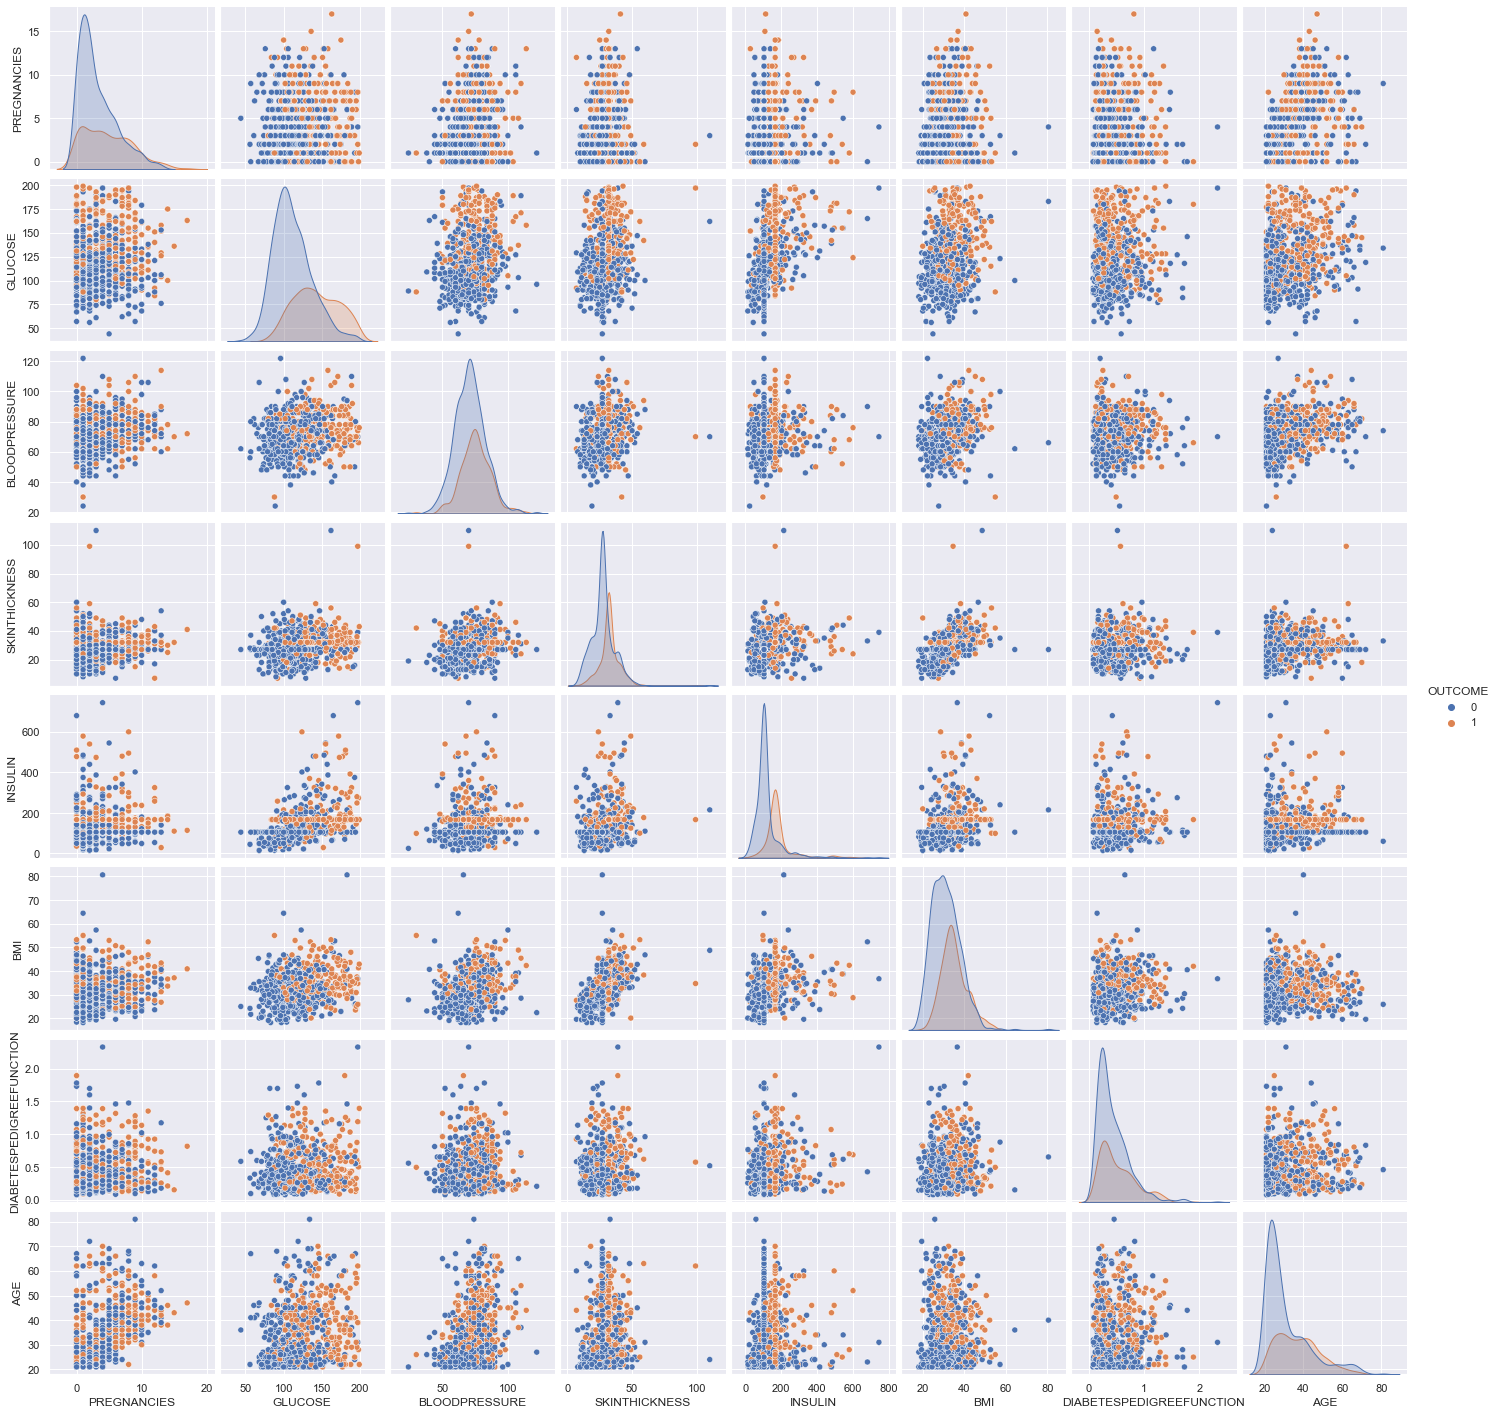

In [94]:
 sns.pairplot(df, hue ='OUTCOME')# # Distribution of results on each feature

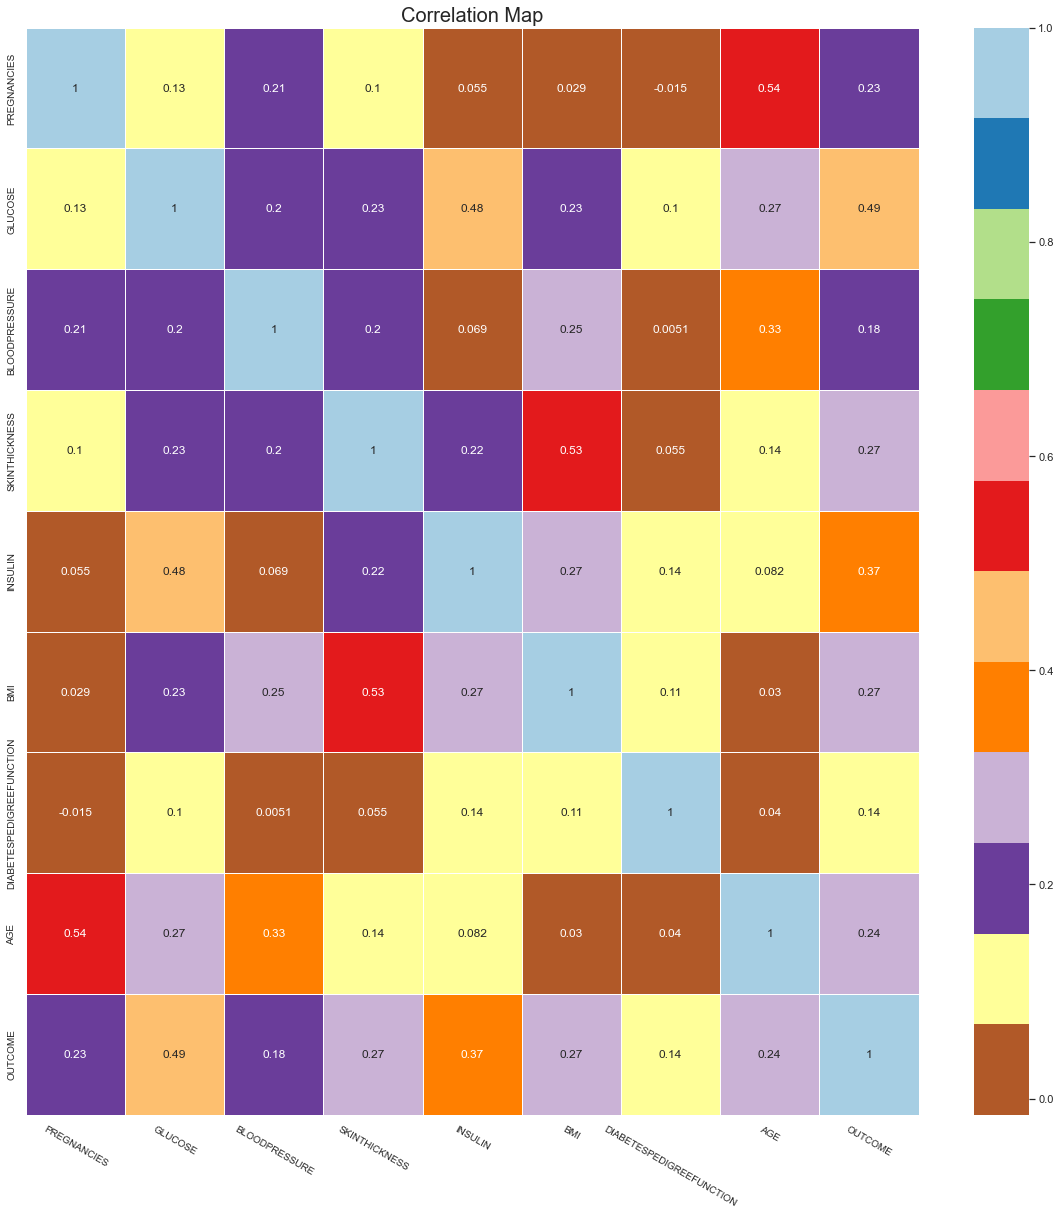

'\n#If the correlation value is bigger than 0, there is a positive correlation. \n While the value of one variable increases, the value of the other variable also increases.  \n When there is equality of Correlation = 0 means no correlation. \n If the correlation is smaller than 0, there is a negative correlation. While one variable increases, the other variable decreases. \n When the correlations are examined, there are 2 variables that act as a positive correlation to the Outcome dependent variable. \n These variables are Glucose. As these increase, Outcome variable increases.\n'

In [95]:
correlated_map(df, plot=True)
'''
#If the correlation value is bigger than 0, there is a positive correlation. 
 While the value of one variable increases, the value of the other variable also increases.  
 When there is equality of Correlation = 0 means no correlation. 
 If the correlation is smaller than 0, there is a negative correlation. While one variable increases, the other variable decreases. 
 When the correlations are examined, there are 2 variables that act as a positive correlation to the Outcome dependent variable. 
 These variables are Glucose. As these increase, Outcome variable increases.
'''

C:\Users\48869\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


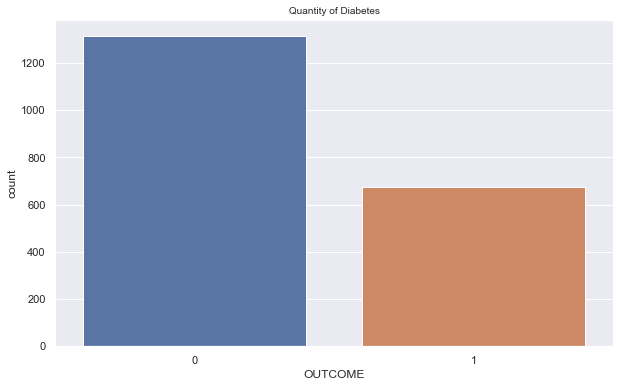

In [96]:
plt.figure(figsize=(10,6))
sns.countplot(df["OUTCOME"])
plt.title("Quantity of Diabetes", size=10)
plt.show()#View results histogram

## Model Creation and training datasets without scaling

In [97]:
#Selection of datasets
X = df.iloc[:,:-1].values#allocates the data
y = df.iloc[:,-1].values#allocates the target

In [98]:
#splitting the dataset
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=0)

### LogisticRegression

In [99]:
# using Logistic Regression algorithm
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)#Fitting the values of x and y
train_accuracy = model_LR.score(X_train, y_train)# Assign the training score 
test_accuracy = model_LR.score(X_test, y_test)#Assign testing score
print("Logistic Regression model:")
print("Training model accuracy:{:.3f}".format(train_accuracy))#Print Training Accuracy
print("Testing model accuracy :{:.3f}".format(test_accuracy))#Print Testing Accuracy

Logistic Regression model:
Training model accuracy:0.780
Testing model accuracy :0.771


### KNearestNeighbors

In [100]:
model_knn = KNeighborsClassifier()                #knn classifier
model_knn.fit(X_train,y_train)#Fitting the values of x and y with the KNN model
# Assign the training score 
train_accuracy = model_knn.score(X_train, y_train)
test_accuracy = model_knn.score(X_test, y_test)#Assign testing score
print(" K-NN model:")
print("Training model_knn Accuracy:{:.3f}".format(train_accuracy))#Print Training Accuracy
print("Testing model_knn Accuracy: {:.3f}".format(test_accuracy))#Print Testing Accuracy

 K-NN model:
Training model_knn Accuracy:0.955
Testing model_knn Accuracy: 0.918


### Random Forest

In [101]:
# train Random Forest Classifier model
model_RF = RandomForestClassifier(n_estimators=100,random_state=0)                
model_RF.fit(X_train,y_train)#Fitting the values of x and y with the RandomForestClassifier model
train_accuracy = model_RF.score(X_train, y_train)# Assign the training score 
test_accuracy = model_RF.score(X_test, y_test)#Assign testing score
print(" RandomForestClassifier model:")
print("Training model_RF Accuracy:{:.3f}".format(train_accuracy))#Print Training Accuracy
print("Testing model_RF Accuracy: {:.3f}".format(test_accuracy))#Print Testing Accuracy

 RandomForestClassifier model:
Training model_RF Accuracy:1.000
Testing model_RF Accuracy: 0.985


### MLPClassifier

In [102]:
MLP = MLPClassifier(random_state=0)    # using MLPClassifier      
MLP.fit(X_train,y_train) #Fitting the values of x and y with theMLPClassifier model
MLP_train_accuracy = MLP.score(X_train, y_train)# Assign the training score 
MLP_test_accuracy = MLP.score(X_test, y_test)#Assign testing score
print("MLPClassifierr model:")
print("Training model_tree without scalling Accuracy:{:.3f}".format(MLP_train_accuracy))#Print Training Accuracy
print("Testing model_tree without scalling Accuracy: {:.3f}".format(MLP_test_accuracy))#Print Testing Accuracy

MLPClassifierr model:
Training model_tree without scalling Accuracy:0.834
Testing model_tree without scalling Accuracy: 0.814


### PCA

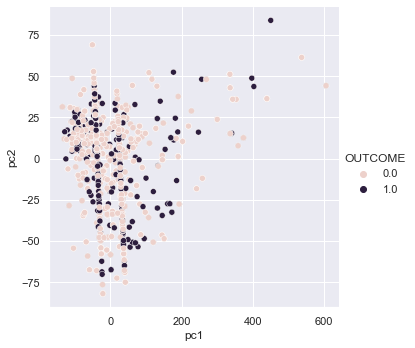

In [103]:
X = df.iloc[:,:-1].values#assign feature values
pca = PCA(n_components = 2)#PCA class instance, the parameter value of the representative component is 2
pComp = pca.fit_transform(X)#Fitted data
PDF = pd.DataFrame(data = pComp, columns = ['pc1','pc2'])#generates a data frame from the 2 components
PCA_df = pd.concat([PDF, df['OUTCOME']], axis = 1)#generates a data frame from the two components and target
sns.relplot(data = PCA_df, x='pc1', y = 'pc2', hue = 'OUTCOME')#Plotting the distribution of "OUTCOME"

## Evaluation metrics and Confusion matrix (without Scaling)

### Logistic Regression

Logistic Regression model:
confusion matrix:
[[341  56]
 [ 81 120]]
Evaluation metrics:
       accuracy    recall  precision  roc_auc_score  f1_score
Score  0.770903  0.597015   0.681818       0.727978  0.770903

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       397
           1       0.68      0.60      0.64       201

    accuracy                           0.77       598
   macro avg       0.74      0.73      0.73       598
weighted avg       0.77      0.77      0.77       598



<AxesSubplot:>

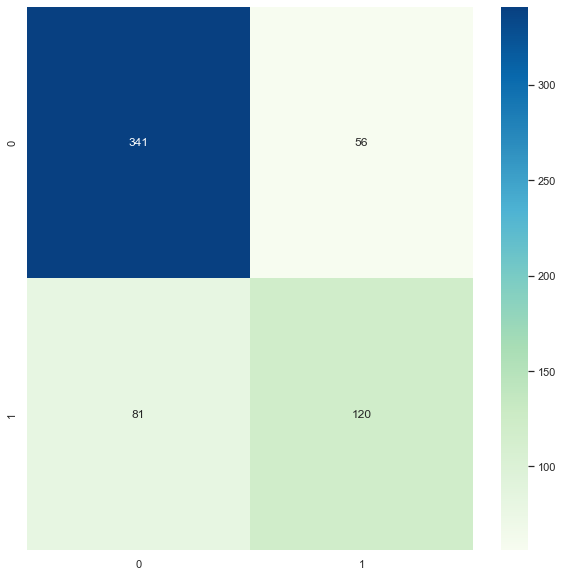

In [104]:
#Confusion Matrix and Evaluation metrics
y_test_LR = model_LR.predict(X_test)# make a prediction
#creates the confusion matrix
cfm_LR = confusion_matrix(y_test,y_test_LR)
print("Logistic Regression model:")
print('confusion matrix:')
print(cfm_LR)#print confusion matrix result
print('Evaluation metrics:')#evaluation metrics for the model
PDF = pd.DataFrame(data=#creates a dataframe 
[
       [
       accuracy_score(y_test,y_test_LR),#Accuracy classification score
       recall_score(y_test,y_test_LR),# recall rate
       precision_score(y_test,y_test_LR),#Precision rate
       roc_auc_score(y_test,y_test_LR),#Predicted Receiver Operating Characteristic Curve  (ROC AUC) 
       f1_score(y_test, y_test_LR, average='micro')  #same like the accuracy_score
       ]
],
       columns=['accuracy','recall','precision','roc_auc_score','f1_score'],index = ['Score'])#The name of each column and the Score associated with each value
print(PDF)#prints the PDF with the evaluation metrics' scores
Report =classification_report(y_test, y_test_LR)
print('')
print(Report)#print the classification_report
plt.figure(figsize = (10,10))#sets the size of the figure
sns.heatmap(data = cfm_LR, cmap="GnBu",annot=True,fmt=".0f")#The heatmap contains the values within the PDF and is displayed inside the matrix


### K-NN model

K-NN model:
confusion matrix:
[[373  24]
 [ 25 176]]
Evaluation metrics:
       accuracy    recall  precision  roc_auc_score  f1_score
Score   0.91806  0.875622       0.88       0.907584   0.91806

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       397
           1       0.88      0.88      0.88       201

    accuracy                           0.92       598
   macro avg       0.91      0.91      0.91       598
weighted avg       0.92      0.92      0.92       598



<AxesSubplot:>

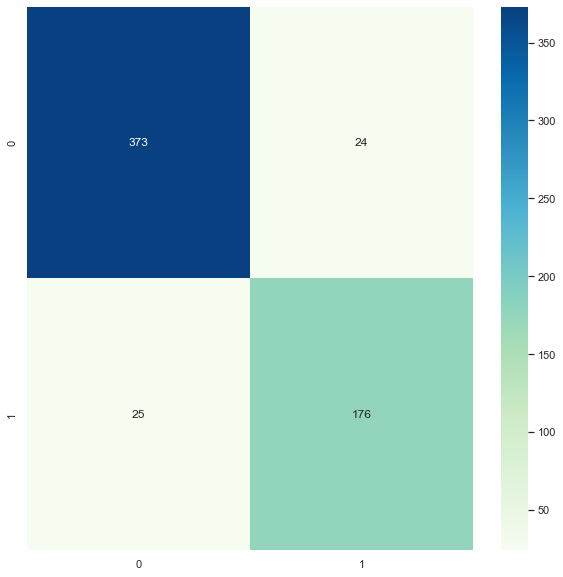

In [105]:
#Confusion Matrix and Evaluation metrics
y_test_knn = model_knn.predict(X_test)# make a prediction
#creates the confusion matrix
cfm_knn = confusion_matrix(y_test,y_test_knn)
print("K-NN model:")
print('confusion matrix:')
print(cfm_knn)#print confusion matrix result
print('Evaluation metrics:')#evaluation metrics for the model
PDF = pd.DataFrame(data=#creates a dataframe 
[
       [
       accuracy_score(y_test,y_test_knn),#Accuracy classification score
       recall_score(y_test,y_test_knn),# recall rate
       precision_score(y_test,y_test_knn),#Precision rate
       roc_auc_score(y_test,y_test_knn),#Predicted Receiver Operating Characteristic Curve  (ROC AUC) 
       f1_score(y_test, y_test_knn, average='micro')#same like the accuracy_score
       ]
],
       columns=['accuracy','recall','precision','roc_auc_score','f1_score'],index = ['Score'])
print(PDF)#prints the PDF with the evaluation metrics' scores
Report =classification_report(y_test, y_test_knn)#creates the cReport of the model, which is a report showing the main classification metrics.
print('')
print(Report)#prints the classification_report
plt.figure(figsize = (10,10))#sets the size of the figure
sns.heatmap(data = cfm_knn, cmap="GnBu",annot=True,fmt=".0f")#The heatmap contains the values within the PDF and is displayed inside the matrix


### MLPClassifier

MLPClassifier model: 
confusion matrix:
[[375  22]
 [ 89 112]]
Evaluation metrics:
       accuracy    recall  precision  roc_auc_score  f1_score
Score  0.814381  0.557214   0.835821       0.750899  0.814381

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       397
           1       0.84      0.56      0.67       201

    accuracy                           0.81       598
   macro avg       0.82      0.75      0.77       598
weighted avg       0.82      0.81      0.80       598



<AxesSubplot:>

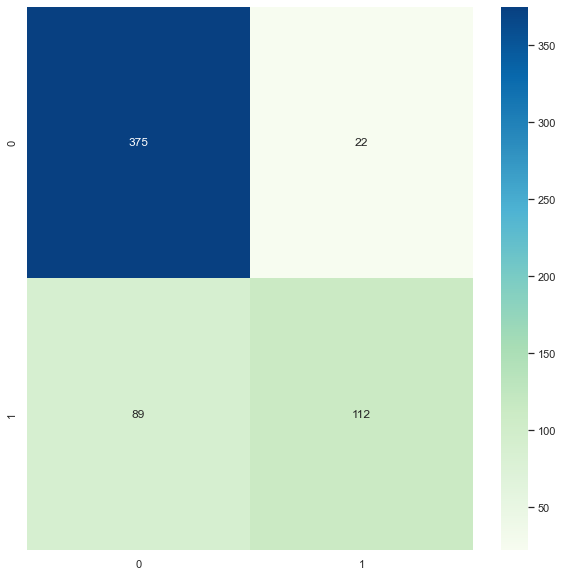

In [106]:
#Confusion Matrix and Evaluation metrics
y_test_MLP = MLP.predict(X_test)# make a prediction
#creates the confusion matrix
cm_MLP = confusion_matrix(y_test,y_test_MLP)
print("MLPClassifier model: ")
print('confusion matrix:')
print(cm_MLP)#print confusion matrix result
print('Evaluation metrics:')#evaluation metrics for the model
PDF = pd.DataFrame(data=#creates a dataframe 
[
       [
       accuracy_score(y_test,y_test_MLP),#Accuracy classification score
       recall_score(y_test,y_test_MLP),# recall rate
       precision_score(y_test,y_test_MLP),#Precision rate
       roc_auc_score(y_test,y_test_MLP),#Predicted Receiver Operating Characteristic Curve  (ROC AUC) 
       f1_score(y_test, y_test_MLP, average='micro')#same like the accuracy_score
       ]
],
       columns=['accuracy','recall','precision','roc_auc_score','f1_score'],index = ['Score'])
print(PDF)#prints the PDF with the evaluation metrics' scores
Report =classification_report(y_test, y_test_MLP)#creates the cReport of the model, which is a report showing the main classification metrics.
print('')
print(Report)#prints the classification_report
plt.figure(figsize = (10,10))#sets the size of the figure
sns.heatmap(data = cm_MLP, cmap="GnBu",annot=True,fmt=".0f")#The heatmap contains the values within the PDF and is displayed inside the matrix


###   Random Forest Classifier 

RandomForestClassifier  model: 
confusion matrix:
[[390   7]
 [  2 199]]
Evaluation metrics:
       accuracy   recall  precision  roc_auc_score  f1_score
Score   0.98495  0.99005   0.966019       0.986209   0.98495

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       397
           1       0.97      0.99      0.98       201

    accuracy                           0.98       598
   macro avg       0.98      0.99      0.98       598
weighted avg       0.99      0.98      0.98       598



<AxesSubplot:>

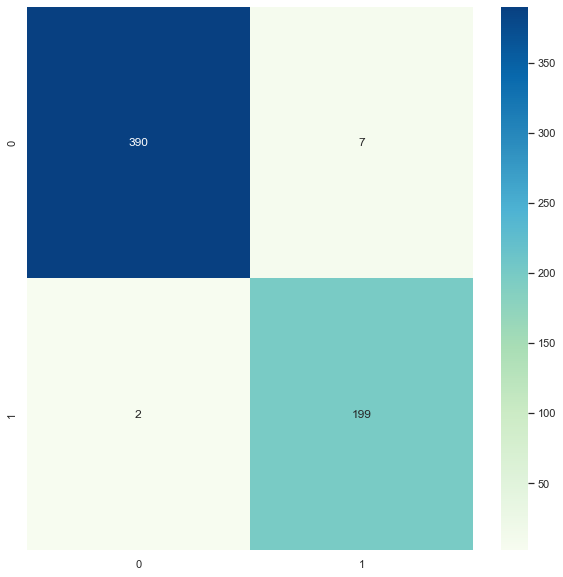

In [107]:
#Confusion Matrix and Evaluation metrics
y_test_RF = model_RF.predict(X_test)# make a prediction
#creates the confusion matrix
cm_RF = confusion_matrix(y_test,y_test_RF)
print("RandomForestClassifier  model: ")
print('confusion matrix:')
print(cm_RF)#print confusion matrix result
print('Evaluation metrics:')#evaluation metrics for the model
PDF = pd.DataFrame(data=#creates a dataframe 
[
       [
       accuracy_score(y_test,y_test_RF),#Accuracy classification score
       recall_score(y_test,y_test_RF),# recall rate
       precision_score(y_test,y_test_RF),#Precision rate
       roc_auc_score(y_test,y_test_RF),#Predicted Receiver Operating Characteristic Curve  (ROC AUC) 
       f1_score(y_test, y_test_RF, average='micro')#same like the accuracy_score
       ]
],
       columns=['accuracy','recall','precision','roc_auc_score','f1_score'],index = ['Score'])
print(PDF)#prints the PDF with the evaluation metrics' scores
Report =classification_report(y_test, y_test_RF)#creates the cReport of the model, which is a report showing the main classification metrics.
print('')
print(Report)#prints the classification_report
plt.figure(figsize = (10,10))#sets the size of the figure
sns.heatmap(data = cm_RF, cmap="GnBu",annot=True,fmt=".0f")#The heatmap contains the values within the PDF and is displayed inside the matrix


### curve

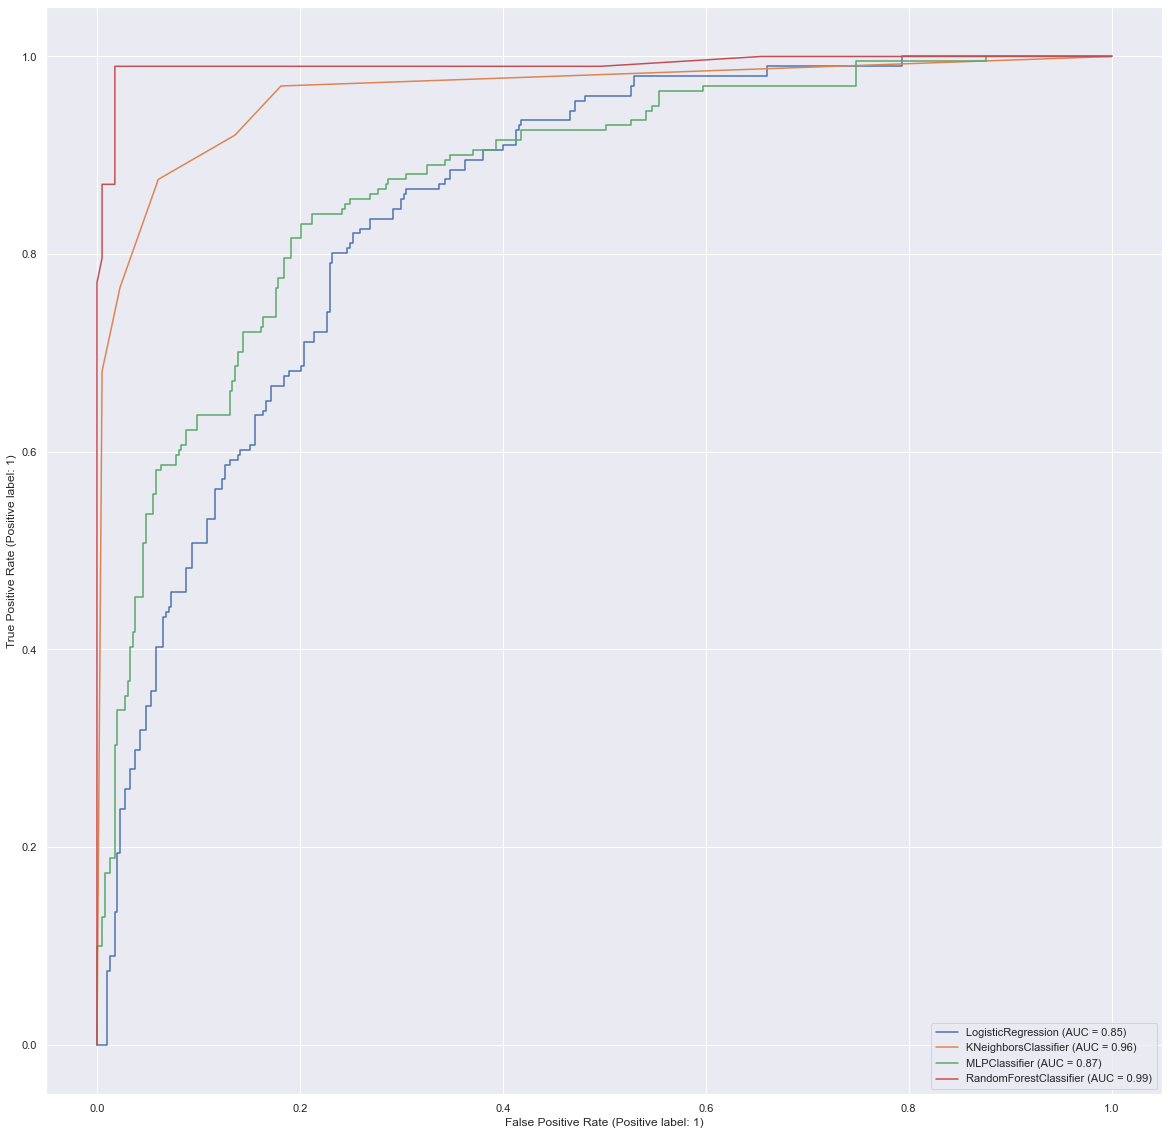

In [108]:
disp = plot_roc_curve(model_LR, X_test, y_test)
plot_roc_curve(model_knn,X_test, y_test, ax = disp.ax_)
plot_roc_curve(MLP,X_test, y_test, ax = disp.ax_)
plot_roc_curve(model_RF, X_test, y_test,ax = disp.ax_)

## Training datasets with scaling 

In [109]:
X = df.iloc[:,:-1].values#data selectedand  give a  pandas series 

scaler = StandardScaler()#Pre-processed data
df[num_cols] = scaler.fit_transform(df[num_cols])#Fit model with scaling features

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)#Split dataset

### Logistic Regression algorithm

In [110]:
# using Logistic Regression algorithm
model_LRSC= LogisticRegression(C=100,max_iter=1000)#Use logistic regression and max_iter to 1000
model_LRSC.fit(X_train, y_train)#Fit model with scaling features

LRSC_train_accuracy = model_LRSC.score(X_train, y_train)# Assign the training score 
LRSC_test_accuracy = model_LRSC.score(X_test, y_test)#Assign testing score
print("Logistic Regression model:")
print("Training model with scalling accuracy:{:.3f}".format(LRSC_train_accuracy))#Print Training Accuracy
print("Testing model with scalling accuracy :{:.3f}".format(LRSC_test_accuracy))#Print Testing Accuracy

Logistic Regression model:
Training model with scalling accuracy:0.778
Testing model with scalling accuracy :0.771


### K-NN algorithm

In [111]:
# using K-NN algorithm
model_knnSC = KNeighborsClassifier()       
model_knnSC.fit(X_train,y_train)#Fitting the values of x and y with the KNN model
# Assign the training score 
knnSC_train_accuracy = model_knnSC.score(X_train, y_train)
knnSC_test_accuracy = model_knnSC.score(X_test, y_test)#Assign testing score
print(" K-NN model:")
print(" Training model_knn with scalling Accuracy:{:.3f}".format(knnSC_train_accuracy))#Print Training Accuracy
print(" Testing model_knn with scalling Accuracy: {:.3f}".format(knnSC_test_accuracy))#Print Testing Accuracy

 K-NN model:
 Training model_knn with scalling Accuracy:0.958
 Testing model_knn with scalling Accuracy: 0.910


### MLPClassifier

In [112]:
MLPSC = MLPClassifier(random_state=0)    # using MLPClassifier      
MLPSC.fit(X_train,y_train) #Fitting the values of x and y with theMLPClassifier model
MLPSC_train_accuracy = MLPSC.score(X_train, y_train)# Assign the training score 
MLPSC_test_accuracy = MLPSC.score(X_test, y_test)#Assign testing score
print("MLPClassifierr model:")
print("Training model_tree with scalling Accuracy:{:.3f}".format(MLPSC_train_accuracy))#Print Training Accuracy
print("Testing model_tree with scalling Accuracy: {:.3f}".format(MLPSC_test_accuracy))#Print Testing Accuracy
0.9959798994974876

MLPClassifierr model:
Training model_tree with scalling Accuracy:0.868
Testing model_tree with scalling Accuracy: 0.841


0.9959798994974876

###  Random Forest Classifier model

In [113]:
#  Random Forest Classifier model
model_RFSC = RandomForestClassifier()                
model_RFSC.fit(X_train,y_train)#Fitting the values of x and y with the RandomForestClassifier model

RFSC_train_accuracy = model_RFSC.score(X_train, y_train)# Assign the training score 
RFSC_test_accuracy = model_RFSC.score(X_test, y_test)#Assign testing score
print("Random Forest Classifier model:")
print("Training model_RF with scalling Accuracy:{:.3f}".format(RFSC_train_accuracy))#Print Training Accuracy
print("Testing model_RF with scalling Accuracy: {:.3f}".format(RFSC_test_accuracy))#Print Testing Accuracy

Random Forest Classifier model:
Training model_RF with scalling Accuracy:1.000
Testing model_RF with scalling Accuracy: 0.980


### PCA

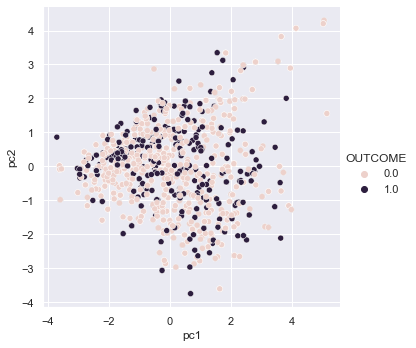

In [114]:
X = df.iloc[:,:-1].values#assign feature values
pca = PCA(n_components = 2)#PCA class instance, the parameter value of the representative component is 2
pComp = pca.fit_transform(X)#Fitted data
PDF = pd.DataFrame(data = pComp, columns = ['pc1','pc2'])#generates a data frame from the 2 components
PCA_df = pd.concat([PDF, df['OUTCOME']], axis = 1)#generates a data frame from the two components and target
sns.relplot(data = PCA_df, x='pc1', y = 'pc2', hue = 'OUTCOME')#Plotting the distribution of "OUTCOME"

## Evaluation metrics and Confusion matrix (Scaling)

###  Logistic Regression 

Logistic Regression model:
confusion matrix:
[[284  49]
 [ 65 100]]
Evaluation metrics:
       accuracy    recall  precision  roc_auc_score  f1_score
Score  0.771084  0.606061   0.671141       0.729457  0.771084

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       333
           1       0.67      0.61      0.64       165

    accuracy                           0.77       498
   macro avg       0.74      0.73      0.73       498
weighted avg       0.77      0.77      0.77       498



<AxesSubplot:>

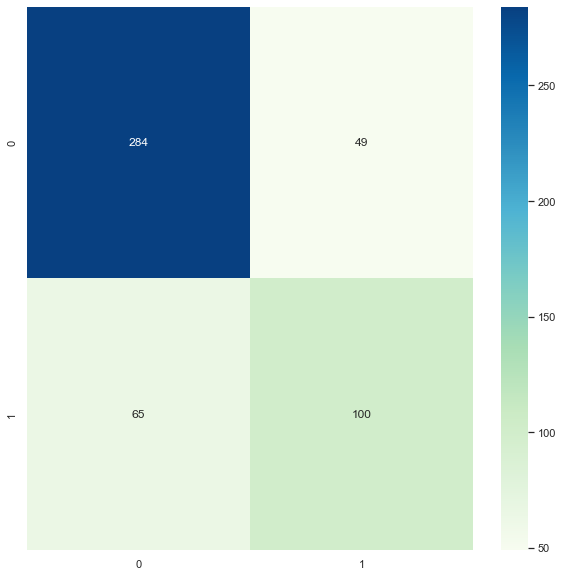

In [115]:
#Confusion Matrix and Evaluation metrics
y_test_LRSC = model_LRSC.predict(X_test)# make a prediction
#creates the confusion matrix
cfm_LRSC = confusion_matrix(y_test,y_test_LRSC)
print("Logistic Regression model:")
print('confusion matrix:')
print(cfm_LRSC)#print confusion matrix result
print('Evaluation metrics:')#evaluation metrics for the model
PDF = pd.DataFrame(data=#creates a dataframe 
[
       [
       accuracy_score(y_test,y_test_LRSC),#Accuracy classification score
       recall_score(y_test,y_test_LRSC),# recall rate
       precision_score(y_test,y_test_LRSC),#Precision rate
       roc_auc_score(y_test,y_test_LRSC),#Predicted Receiver Operating Characteristic Curve  (ROC AUC) 
       f1_score(y_test, y_test_LRSC, average='micro')  #same like the accuracy_score
       ]
],
       columns=['accuracy','recall','precision','roc_auc_score','f1_score'],index = ['Score'])#The name of each column and the Score associated with each value
print(PDF)#prints the PDF with the evaluation metrics' scores
Report =classification_report(y_test, y_test_LRSC)
print('')
print(Report)#print the classification_report
plt.figure(figsize = (10,10))#sets the size of the figure
sns.heatmap(data = cfm_LRSC, cmap="GnBu",annot=True,fmt=".0f")#The heatmap contains the values within the PDF and is displayed inside the matrix


### knn

K-NN model:
confusion matrix:
[[306  27]
 [ 18 147]]
Evaluation metrics:
       accuracy    recall  precision  roc_auc_score  f1_score
Score  0.909639  0.890909   0.844828       0.904914  0.909639

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       333
           1       0.84      0.89      0.87       165

    accuracy                           0.91       498
   macro avg       0.89      0.90      0.90       498
weighted avg       0.91      0.91      0.91       498



<AxesSubplot:>

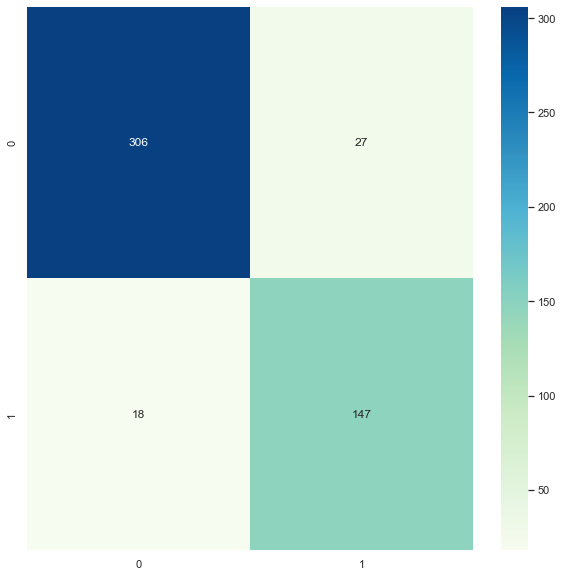

In [116]:
#Confusion Matrix and Evaluation metrics
y_test_knnSC = model_knnSC.predict(X_test)# make a prediction
#creates the confusion matrix
cfm_KNNSC = confusion_matrix(y_test,y_test_knnSC)
print("K-NN model:")
print('confusion matrix:')
print(cfm_KNNSC)#print confusion matrix result
print('Evaluation metrics:')#evaluation metrics for the model
PDF = pd.DataFrame(data=#creates a dataframe 
[
       [
       accuracy_score(y_test,y_test_knnSC),#Accuracy classification score
       recall_score(y_test,y_test_knnSC),# recall rate
       precision_score(y_test,y_test_knnSC),#Precision rate
       roc_auc_score(y_test,y_test_knnSC),#Predicted Receiver Operating Characteristic Curve  (ROC AUC) 
       f1_score(y_test, y_test_knnSC, average='micro')#same like the accuracy_score
       ]
],
       columns=['accuracy','recall','precision','roc_auc_score','f1_score'],index = ['Score'])
print(PDF)#prints the PDF with the evaluation metrics' scores
Report =classification_report(y_test, y_test_knnSC)#creates the cReport of the model, which is a report showing the main classification metrics.
print('')
print(Report)#prints the classification_report
plt.figure(figsize = (10,10))#sets the size of the figure
sns.heatmap(data = cfm_KNNSC, cmap="GnBu",annot=True,fmt=".0f")#The heatmap contains the values within the PDF and is displayed inside the matrix


### MLPClassifier

MLPClassifier model: 
confusion matrix:
[[314  19]
 [ 60 105]]
Evaluation metrics:
       accuracy    recall  precision  roc_auc_score  f1_score
Score  0.841365  0.636364   0.846774       0.789653  0.841365

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       333
           1       0.85      0.64      0.73       165

    accuracy                           0.84       498
   macro avg       0.84      0.79      0.81       498
weighted avg       0.84      0.84      0.83       498



<AxesSubplot:>

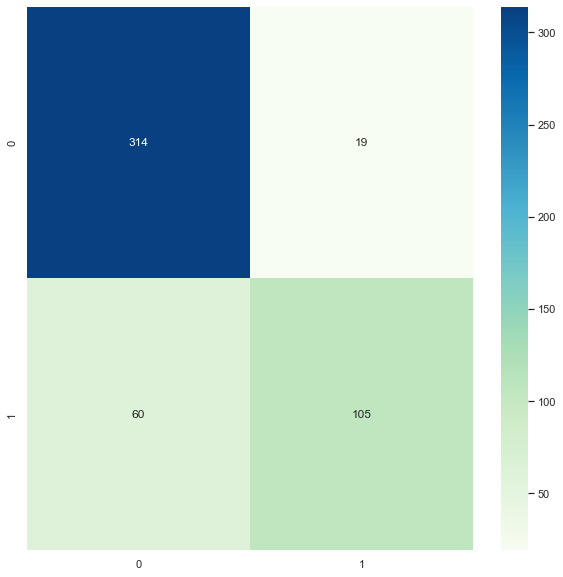

In [117]:
#Confusion Matrix and Evaluation metrics
y_test_MLPSC = MLPSC.predict(X_test)# make a prediction
#creates the confusion matrix
cfm_MLPSC = confusion_matrix(y_test,y_test_MLPSC)
print("MLPClassifier model: ")
print('confusion matrix:')
print(cfm_MLPSC)#print confusion matrix result
print('Evaluation metrics:')#evaluation metrics for the model
PDF = pd.DataFrame(data=#creates a dataframe 
[
       [
       accuracy_score(y_test,y_test_MLPSC),#Accuracy classification score
       recall_score(y_test,y_test_MLPSC),# recall rate
       precision_score(y_test,y_test_MLPSC),#Precision rate
       roc_auc_score(y_test,y_test_MLPSC),#Predicted Receiver Operating Characteristic Curve  (ROC AUC) 
       f1_score(y_test, y_test_MLPSC, average='micro')#same like the accuracy_score
       ]
],
       columns=['accuracy','recall','precision','roc_auc_score','f1_score'],index = ['Score'])
print(PDF)#prints the PDF with the evaluation metrics' scores
Report =classification_report(y_test, y_test_MLPSC)#creates the cReport of the model, which is a report showing the main classification metrics.
print('')
print(Report)#prints the classification_report
plt.figure(figsize = (10,10))#sets the size of the figure
sns.heatmap(data = cfm_MLPSC, cmap="GnBu",annot=True,fmt=".0f")#The heatmap contains the values within the PDF and is displayed inside the matrix


### Random Forest Classifier model

RandomForestClassifier  model: 
confusion matrix:
[[323  10]
 [  0 165]]
Evaluation metrics:
       accuracy  recall  precision  roc_auc_score  f1_score
Score   0.97992     1.0   0.942857       0.984985   0.97992

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       333
           1       0.94      1.00      0.97       165

    accuracy                           0.98       498
   macro avg       0.97      0.98      0.98       498
weighted avg       0.98      0.98      0.98       498



<AxesSubplot:>

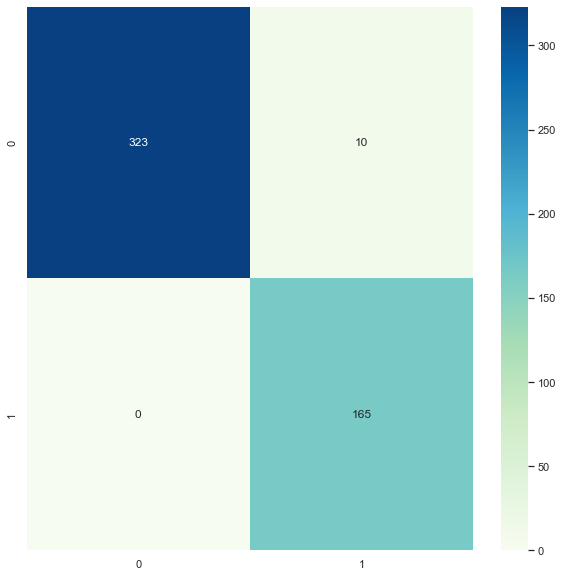

In [118]:
#Confusion Matrix and Evaluation metrics
y_test_RFSC = model_RFSC.predict(X_test)# make a prediction
#creates the confusion matrix
cfm_RFSC = confusion_matrix(y_test,y_test_RFSC)
print("RandomForestClassifier  model: ")
print('confusion matrix:')
print(cfm_RFSC)#print confusion matrix result
print('Evaluation metrics:')#evaluation metrics for the model
PDF = pd.DataFrame(data=#creates a dataframe 
[
       [
       accuracy_score(y_test,y_test_RFSC),#Accuracy classification score
       recall_score(y_test,y_test_RFSC),# recall rate
       precision_score(y_test,y_test_RFSC),#Precision rate
       roc_auc_score(y_test,y_test_RFSC),#Predicted Receiver Operating Characteristic Curve  (ROC AUC) 
       f1_score(y_test, y_test_RFSC, average='micro')#same like the accuracy_score
       ]
],
       columns=['accuracy','recall','precision','roc_auc_score','f1_score'],index = ['Score'])
print(PDF)#prints the PDF with the evaluation metrics' scores
Report =classification_report(y_test, y_test_RFSC)#creates the cReport of the model, which is a report showing the main classification metrics.
print('')
print(Report)#prints the classification_report
plt.figure(figsize = (10,10))#sets the size of the figure
sns.heatmap(data = cfm_RFSC, cmap="GnBu",annot=True,fmt=".0f")#The heatmap contains the values within the PDF and is displayed inside the matrix


## Hyperparameter tuning and Optimisation models

### Logistic Regression 

In [119]:
model = LogisticRegression()                      #Solution help by Mark Elshaw 
LR_Dic=dict()# set dic and Getting indexes of values per hyper-parameter
#Add Hyperparametrs
LR_Dic['multi_class']= ['auto','ovr','multionmial']
LR_Dic['solver']=['liblinear', 'saga','newton-cg', 'lbfgs', 'sag',]
LR_Dic['penalty']= ['l1','l2','elasticnet','none']
# LR_Dic['c_values']= [100, 10, 1.0, 0.1, 0.01, 0.001]  
print(LR_Dic)#prints dictionary 

{'multi_class': ['auto', 'ovr', 'multionmial'], 'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag'], 'penalty': ['l1', 'l2', 'elasticnet', 'none']}


 #### GridSearch

In [120]:
#!!!  Dr. Trang Doan week6 solution

grid_LR = GridSearchCV(model, LR_Dic, cv=5, scoring = "accuracy", return_train_score = False)# Perform a grid search
grid_LR.fit(X,y)#Fit instances of Gridsearch

C:\Users\48869\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\48869\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\48869\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\48869\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("E

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multionmial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs',
                                    'sag']},
             scoring='accuracy')

In [121]:
print(grid_LR.best_score_)#print Best Score
print(grid_LR.best_params_)#print Best parameter
print(grid_LR.best_estimator_)#print estimator

0.777504061661692
{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(solver='liblinear')


In [122]:
pd.DataFrame(grid_LR.cv_results_)[["mean_test_score","params"]] 

,mean_test_score,params
0,0.777002,"{'multi_class': 'auto', 'penalty': 'l1', 'solv..."
1,0.776500,"{'multi_class': 'auto', 'penalty': 'l1', 'solv..."
2,NaN,"{'multi_class': 'auto', 'penalty': 'l1', 'solv..."
3,NaN,"{'multi_class': 'auto', 'penalty': 'l1', 'solv..."
4,NaN,"{'multi_class': 'auto', 'penalty': 'l1', 'solv..."
5,0.777504,"{'multi_class': 'auto', 'penalty': 'l2', 'solv..."
6,0.777002,"{'multi_class': 'auto', 'penalty': 'l2', 'solv..."
7,0.777002,"{'multi_class': 'auto', 'penalty': 'l2', 'solv..."
8,0.777002,"{'multi_class': 'auto', 'penalty': 'l2', 'solv..."
9,0.777002,"{'multi_class': 'auto', 'penalty': 'l2', 'solv..."


#### Random Search

In [123]:
# Dr. Trang Doan weekk6 solution

rand = RandomizedSearchCV(model, LR_Dic, cv =5, scoring ="accuracy", n_iter = 20, random_state =5, return_train_score = False)#performs random search on KNN
rand.fit(X,y)#fits the X and y data

C:\Users\48869\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\48869\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\48869\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\48869\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'multi_class': ['auto', 'ovr',
                                                        'multionmial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['liblinear', 'saga',
                                                   'newton-cg', 'lbfgs',
                                                   'sag']},
                   random_state=5, scoring='accuracy')

In [124]:
print(rand.best_score_)#print Best Score
print(rand.best_params_)#print Best para
print(rand.best_estimator_)#print estimatormeter

0.7770015490988779
{'solver': 'sag', 'penalty': 'none', 'multi_class': 'auto'}
LogisticRegression(penalty='none', solver='sag')


#### Optimised Logistic Regression  model and cross-validation

In [125]:
model_OP = LogisticRegression(C=100,multi_class='auto',penalty='l2',max_iter=1000,solver='liblinear')
model_OP.fit(X_train, y_train) 
train_accuracy_OP= model_OP.score(X_train, y_train)
test_accuracy_OP = model_OP.score(X_test, y_test)
#Cross-validation: evaluating estimator performance
scores = cross_val_score(model_OP,X,y,cv = 5,scoring = 'accuracy')
print("Logistic Regression model:")
print("Training model accuracy:{:.3f}".format(train_accuracy_OP))
print("Testing model accuracy :{:.3f}".format(test_accuracy_OP))
print(scores)
print("Max score:{:.3f}".format(scores.mean()))


Logistic Regression model:
Training model accuracy:0.778
Testing model accuracy :0.771
[0.76691729 0.79145729 0.79396985 0.73366834 0.79899497]
Max score:0.777


#### Evaluation metrics and Confusion matrix (Hyperparameter)

Logistic Regression model:
confusion matrix:
[[284  49]
 [ 65 100]]
Evaluation metrics:
       accuracy    recall  precision  roc_auc_score  f1_score
Score  0.771084  0.606061   0.671141       0.729457  0.771084

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       333
           1       0.67      0.61      0.64       165

    accuracy                           0.77       498
   macro avg       0.74      0.73      0.73       498
weighted avg       0.77      0.77      0.77       498



<AxesSubplot:>

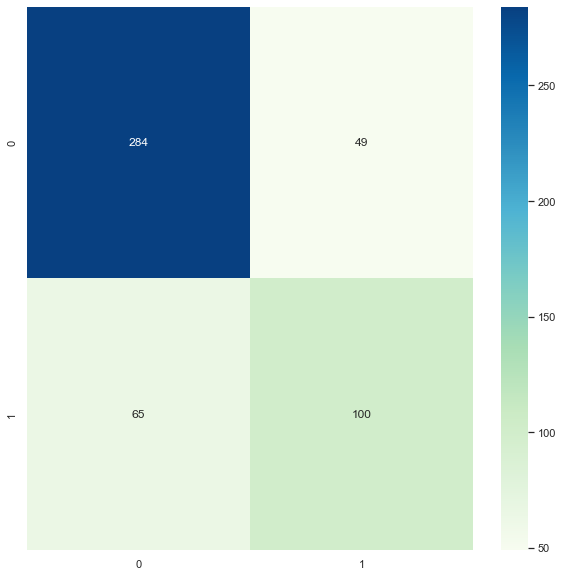

In [126]:
#Confusion Matrix and Evaluation metrics
y_test_OP = model_OP.predict(X_test)
#creates the confusion matrix
cfm_LROP = confusion_matrix(y_test,y_test_OP)
print("Logistic Regression model:")
print('confusion matrix:')
print(cfm_LROP)#print confusion matrix result
print('Evaluation metrics:')#evaluation metrics for the model
PDF = pd.DataFrame(data=#creates a dataframe 
[
       [
       accuracy_score(y_test,y_test_OP),#Accuracy classification score
       recall_score(y_test,y_test_OP),# recall rate
       precision_score(y_test,y_test_OP),#Precision rate
       roc_auc_score(y_test,y_test_OP),#Predicted Receiver Operating Characteristic Curve  (ROC AUC) 
       f1_score(y_test, y_test_OP, average='micro')  #same like the accuracy_score
       ]
],
       columns=['accuracy','recall','precision','roc_auc_score','f1_score'],index = ['Score'])#The name of each column and the Score associated with each value
print(PDF)#prints the PDF with the evaluation metrics' scores
Report =classification_report(y_test, y_test_OP)
print('')
print(Report)#print the classification_report
plt.figure(figsize = (10,10))#sets the size of the figure
sns.heatmap(data = cfm_LROP, cmap="GnBu",annot=True,fmt=".0f")#The heatmap contains the values within the PDF and is displayed inside the matrix


### KNN

In [127]:
#hyperparameter tuning for KNN
model = KNeighborsClassifier()
model.fit(X_train,y_train)#fit the model using X_train as training data and Y_train as target values
k_range = list(range(1,31))# set n_neighbors range
weights_options = ['uniform','distance']
param_grid = dict(n_neighbors = k_range, weights = weights_options)
print(param_grid)#prints dictionary 

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


 #### GridSearch

In [128]:
#!!!  Dr. Trang Doan week6 solution
grid = GridSearchCV(model, param_grid, cv=5, scoring = "accuracy", return_train_score = False)#instance of Grid Search
grid.fit(X,y)#fit the instance of gridsearch using X as training data and Y as target values

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [129]:
print(grid.best_score_)#print Best Score
print(grid.best_params_)#print Best parameter
print(grid.best_estimator_)#print estimator

0.9959798994974876
{'n_neighbors': 15, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=15, weights='distance')


In [130]:
pd.DataFrame(grid.cv_results_)[["mean_test_score","params"]]

,mean_test_score,params
0,0.994472,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.994472,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.964354,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.994472,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.934733,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.993970,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.877459,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.993970,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.870431,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.993970,"{'n_neighbors': 5, 'weights': 'distance'}"


#### Random Search

In [131]:
rand = RandomizedSearchCV(model, param_grid, cv =5, scoring = "accuracy", n_iter = 20, random_state =5, return_train_score = False)#performs random search on KNN
rand.fit(X,y)#fits the X and y data

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'distance']},
                   random_state=5, scoring='accuracy')

In [132]:
print(rand.best_score_)#print Best Score
print(rand.best_params_)#print Best para
print(rand.best_estimator_)#print estimatormeter

0.9959798994974876
{'weights': 'distance', 'n_neighbors': 16}
KNeighborsClassifier(n_neighbors=16, weights='distance')


#### Optimised Logistic Regression  model and cross-validation 

In [133]:
# using K-NN algorithm
model_knnOP = KNeighborsClassifier(n_neighbors=15,weights='distance')                #knn classifier
model_knnOP.fit(X_train,y_train)
#Cross-validation: evaluating estimator performance
scores = cross_val_score(model_knnOP,X,y,cv = 5,scoring = 'accuracy')
knnOP_train_accuracy = model_knnOP.score(X_train, y_train)
knnOP_test_accuracy = model_knnOP.score(X_test, y_test)
print(" K-NN model:")
print(scores)
print(" Training model_knn with scalling Accuracy:{:.3f}".format(knnOP_train_accuracy))
print(" Testing model_knn withing Accuracy: {:.3f}".format(knnOP_test_accuracy)) 

 K-NN model:
[1.         0.99497487 1.         0.98492462 1.        ]
 Training model_knn with scalling Accuracy:1.000
 Testing model_knn withing Accuracy: 0.980


#### Evaluation metrics and Confusion matrix (Hyperparameter)

K-NN model:
confusion matrix:
[[325   8]
 [  2 163]]
Evaluation metrics:
       accuracy    recall  precision  roc_auc_score  f1_score
Score   0.97992  0.987879   0.953216       0.981927   0.97992

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       333
           1       0.95      0.99      0.97       165

    accuracy                           0.98       498
   macro avg       0.97      0.98      0.98       498
weighted avg       0.98      0.98      0.98       498



<AxesSubplot:>

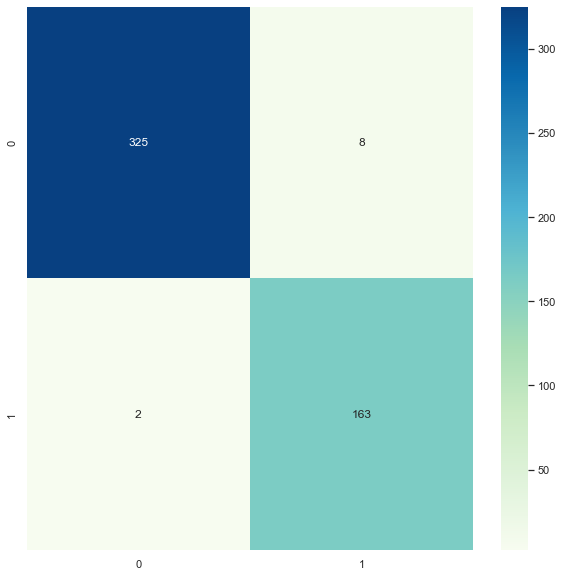

In [134]:
#Confusion Matrix and Evaluation metrics
y_test_knnOP = model_knnOP.predict(X_test)
#creates the confusion matrix
cfm_KNNOP = confusion_matrix(y_test,y_test_knnOP)
print("K-NN model:")
print('confusion matrix:')
print(cfm_KNNOP)#print confusion matrix result
print('Evaluation metrics:')#evaluation metrics for the model
PDF = pd.DataFrame(data=#creates a dataframe 
[
       [
       accuracy_score(y_test,y_test_knnOP),#Accuracy classification score
       recall_score(y_test,y_test_knnOP),# recall rate
       precision_score(y_test,y_test_knnOP),#Precision rate
       roc_auc_score(y_test,y_test_knnOP),#Predicted Receiver Operating Characteristic Curve  (ROC AUC) 
       f1_score(y_test, y_test_knnOP, average='micro')#same like the accuracy_score
       ]
],
       columns=['accuracy','recall','precision','roc_auc_score','f1_score'],index = ['Score'])
print(PDF)#prints the PDF with the evaluation metrics' scores
Report =classification_report(y_test, y_test_knnOP)#creates the cReport of the model, which is a report showing the main classification metrics.
print('')
print(Report)#prints the classification_report
plt.figure(figsize = (10,10))#sets the size of the figure
sns.heatmap(data = cfm_KNNOP, cmap="GnBu",annot=True,fmt=".0f")#The heatmap contains the values within the PDF and is displayed inside the matrix



### Random Forest

In [135]:
model = RandomForestClassifier()#hyperparameter tuning for RF
model.fit(X_train,y_train)#fit the model using X_train as training data and Y_train as target values
RF_DIC=dict()
RF_DIC['class_weight']=['balanced', 'balanced_subsample']
# RF_DIC['criterion'] = ['gini','entropy']
RF_DIC['max_features']=['auto', 'sqrt','log2']
# RF_DIC['max_leaf_nodes'] = []
RF_DIC['min_samples_split'] = [2,3,4]
# RF_DIC['min_samples_leaf'] = [1, 3, 5]
# RF_DIC['max_depth'] = [3, 6, 10, None] take too much time
print(RF_DIC)#prints dictionary 

{'class_weight': ['balanced', 'balanced_subsample'], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3, 4]}


 #### GridSearch

In [136]:
#!!!  Dr. Trang Doan week6 solution
grid = GridSearchCV(model, RF_DIC, cv=5, scoring = "accuracy", return_train_score = False)#instance of Grid Search
grid.fit(X,y)#fit the instance of gridsearch using X as training data and Y as target values

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [137]:
print(grid.best_score_)#print Best Score
print(grid.best_params_)#print Best parameter
print(grid.best_estimator_)#print estimator

0.9954773869346735
{'class_weight': 'balanced', 'max_features': 'sqrt', 'min_samples_split': 3}
RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       min_samples_split=3)


#### Random Search

In [138]:
#!!!  Dr. Trang Doan week6 solution
rand = RandomizedSearchCV(model, RF_DIC, cv =5, scoring = "accuracy", n_iter = 20, random_state =5, return_train_score = False)#performs random search on KNN
rand.fit(X,y)#fits the X and y data

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 3, 4]},
                   random_state=5, scoring='accuracy')

In [139]:
print(rand.best_score_)#print Best Score
print(rand.best_params_)#print Best para
print(rand.best_estimator_)#print estimatormeter

0.9949748743718594
{'min_samples_split': 2, 'max_features': 'auto', 'class_weight': 'balanced'}
RandomForestClassifier(class_weight='balanced')


#### Optimised RandomForestClassifier model and cross-validation

In [140]:
# train Random Forest Classifier model
model_RFOP = RandomForestClassifier(class_weight='balanced',
                       max_features='auto', min_samples_split=2)           
model_RFOP.fit(X_train,y_train)
#Cross-validation: evaluating estimator performance
scores = cross_val_score(model_RFOP,X,y,cv=5,scoring='accuracy')
train_accuracy = model_RFOP.score(X_train, y_train)
test_accuracy = model_RFOP.score(X_test, y_test)
print(scores)
print("Training model_RFOP Accuracy:{:.3f}".format(train_accuracy))
print("Testing model_RFOP Accuracy: {:.3f}".format(test_accuracy))

[1.         1.         1.         0.97487437 1.        ]
Training model_RFOP Accuracy:1.000
Testing model_RFOP Accuracy: 0.984


#### Evaluation metrics and Confusion matrix (Hyperparameter)

Logistic Regression model:
confusion matrix:
[[325   8]
 [  0 165]]
Evaluation metrics:
                                    precision    recall  f1-score   support

Probability of NOT having diabetes       1.00      0.98      0.99       333
    Probability of having diabetes       0.95      1.00      0.98       165

                          accuracy                           0.98       498
                         macro avg       0.98      0.99      0.98       498
                      weighted avg       0.98      0.98      0.98       498

       accuracy  recall  precision  roc_auc_score  f1_score
Score  0.983936     1.0   0.953757       0.987988  0.983936


<AxesSubplot:>

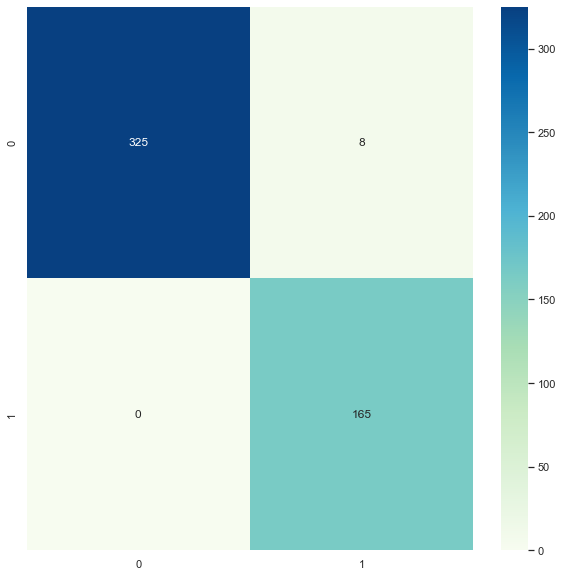

In [141]:
#Confusion Matrix and Evaluation metrics
y_test_RFOP = model_RFOP.predict(X_test)

cfm_RFOP = confusion_matrix(y_test,y_test_RFOP)#creates the confusion matrix
print("Logistic Regression model:")
print('confusion matrix:')
print(cfm_RFOP)
print('Evaluation metrics:')
#evaluation metrics for the model
#creates a dataframe which contains the value of the accuracy, recale, precision and roc_auc score
PDF = pd.DataFrame(data=
[
       [
       accuracy_score(y_test,y_test_RFOP),
       recall_score(y_test,y_test_RFOP),
       precision_score(y_test,y_test_RFOP),
       roc_auc_score(y_test,y_test_RFOP),
       f1_score(y_test, y_test_RFOP, average='micro')
       ]
],
       columns=['accuracy','recall','precision','roc_auc_score','f1_score'],index = ['Score'])

#creates a table with the accuracy, recall, precision and roc_auc scores
labels = ['Probability of NOT having diabetes','Probability of having diabetes']#target names for classification report
Report =classification_report(y_test, y_test_RFOP, target_names=labels)#creates the cReport of the model, which is a report showing the main classification metrics.
print(Report)#prints the classification_report
print(PDF)#prints the df with the score of the evaluation metrics

plt.figure(figsize = (10,10))#sets the size of the figure
sns.heatmap(data = cfm_RFOP, cmap="GnBu",annot=True,fmt=".0f")


### MLPClassifier

In [142]:
model = MLPClassifier()    
MLP_DIC=dict()# set dic and Getting indexes of values per hyper-parameter
MLP_DIC['activation']=['identity', 'logistic', 'tanh', 'relu'] # set 
MLP_DIC['solver']=[ 'lbfgs', 'sgd','adam']
# MLP_DIC['learning_rate']=['constant','invscaling','adaptive']#  long running time 
print(MLP_DIC) #prints dictionary 

{'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam']}


 #### GridSearch

In [143]:
#!!!  Dr. Trang Doan week6 solution
grid = GridSearchCV(model, MLP_DIC, cv=5, scoring = "accuracy", return_train_score = False)#instance of Grid Search
grid.fit(X,y)#fit the instance of gridsearch using X as training data and Y as target values

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy')

In [144]:
print(grid.best_score_)#print Best Score
print(grid.best_params_)#print Best parameter
print(grid.best_estimator_)#print estimator

0.9979899497487438
{'activation': 'logistic', 'solver': 'lbfgs'}
MLPClassifier(activation='logistic', solver='lbfgs')


#### Random Search

In [145]:
#!!!  Dr. Trang Doan week6 solution
rand = RandomizedSearchCV(model, MLP_DIC, cv =5, scoring = "accuracy", n_iter = 20, random_state =5, return_train_score = False)#performs random search on KNN
rand.fit(X,y)#fits the X and y data

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=20,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   random_state=5, scoring='accuracy')

In [146]:
print(rand.best_score_)#print Best Score
print(rand.best_params_)#print Best para
print(rand.best_estimator_)#print estimatormeter

0.9984924623115579
{'solver': 'lbfgs', 'activation': 'tanh'}
MLPClassifier(activation='tanh', solver='lbfgs')


#### Optimised RandomForestClassifier model and cross-validation

In [147]:
# train MLPClassifier
MLP_OP = MLPClassifier(activation='tanh', solver='lbfgs')            
MLP_OP.fit(X_train,y_train)
#Cross-validation: evaluating estimator performance
scores = cross_val_score(MLP_OP,X,y,cv = 5,scoring = 'accuracy')
MLPOP_train_accuracy = MLP_OP.score(X_train, y_train)
MLPOP_test_accuracy = MLP_OP .score(X_test, y_test)
print(scores)
print("MLPClassifierr model:")
print("Training MLP_OP  with scalling Accuracy:{:.3f}".format(MLPOP_train_accuracy))
print("Testing MLP_OP  with scalling Accuracy: {:.3f}".format(MLPOP_test_accuracy))

[1.         0.99748744 1.         0.98492462 1.        ]
MLPClassifierr model:
Training MLP_OP  with scalling Accuracy:0.916
Testing MLP_OP  with scalling Accuracy: 0.857


#### Evaluation metrics and Confusion matrix (Hyperparameter)

MLPClassifier model:
confusion matrix:
[[284  49]
 [ 65 100]]
Evaluation metrics:
       accuracy    recall  precision  roc_auc_score  f1_score
Score   0.85743  0.781818   0.786585       0.838357   0.85743

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       333
           1       0.79      0.78      0.78       165

    accuracy                           0.86       498
   macro avg       0.84      0.84      0.84       498
weighted avg       0.86      0.86      0.86       498



<AxesSubplot:>

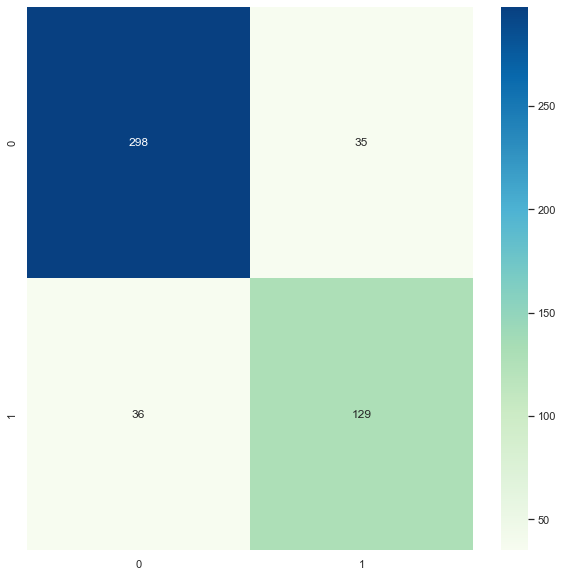

In [148]:
#Confusion Matrix and Evaluation metrics
y_test_MLPOP = MLP_OP.predict(X_test)
#creates the confusion matrix
cfm_MLPOP = confusion_matrix(y_test,y_test_MLPOP)
print("MLPClassifier model:")
print('confusion matrix:')
print(cfm_LROP)#print confusion matrix result
print('Evaluation metrics:')#evaluation metrics for the model
PDF = pd.DataFrame(data=#creates a dataframe 
[
       [
       accuracy_score(y_test,y_test_MLPOP),#Accuracy classification score
       recall_score(y_test,y_test_MLPOP),# recall rate
       precision_score(y_test,y_test_MLPOP),#Precision rate
       roc_auc_score(y_test,y_test_MLPOP),#Predicted Receiver Operating Characteristic Curve  (ROC AUC) 
       f1_score(y_test, y_test_MLPOP, average='micro')  #same like the accuracy_score
       ]
],
       columns=['accuracy','recall','precision','roc_auc_score','f1_score'],index = ['Score'])#The name of each column and the Score associated with each value
print(PDF)#prints the PDF with the evaluation metrics' scores
Report =classification_report(y_test, y_test_MLPOP)
print('')
print(Report)#print the classification_report
plt.figure(figsize = (10,10))#sets the size of the figure
sns.heatmap(data = cfm_MLPOP, cmap="GnBu",annot=True,fmt=".0f")#The heatmap contains the values within the PDF and is displayed inside the matrix
